In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress


In [3]:
# Specify the path to your CSV file
file_path = r'C:\Users\manda\Documents\Master thesis Data\Eversleigh text fileindcal.csv'


# Try different encodings until you find the right one
encodings = ['utf-8', 'latin1', 'utf-16']

for encoding in encodings:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding=encoding)
        # Display the DataFrame
        print(df)
        break
    except UnicodeDecodeError:
        print(f"Failed to decode using encoding: {encoding}")

# Display the DataFrame
print(df)

       year  month  day  prcp  tmax  tmin
0      1877      1    1 -99.9 -99.9 -99.9
1      1877      1    2 -99.9 -99.9 -99.9
2      1877      1    3 -99.9 -99.9 -99.9
3      1877      1    4 -99.9 -99.9 -99.9
4      1877      1    5 -99.9 -99.9 -99.9
...     ...    ...  ...   ...   ...   ...
16795  1922     12   27 -99.9 -99.9 -99.9
16796  1922     12   28 -99.9 -99.9 -99.9
16797  1922     12   29 -99.9 -99.9 -99.9
16798  1922     12   30 -99.9 -99.9 -99.9
16799  1922     12   31 -99.9 -99.9 -99.9

[16800 rows x 6 columns]
       year  month  day  prcp  tmax  tmin
0      1877      1    1 -99.9 -99.9 -99.9
1      1877      1    2 -99.9 -99.9 -99.9
2      1877      1    3 -99.9 -99.9 -99.9
3      1877      1    4 -99.9 -99.9 -99.9
4      1877      1    5 -99.9 -99.9 -99.9
...     ...    ...  ...   ...   ...   ...
16795  1922     12   27 -99.9 -99.9 -99.9
16796  1922     12   28 -99.9 -99.9 -99.9
16797  1922     12   29 -99.9 -99.9 -99.9
16798  1922     12   30 -99.9 -99.9 -99.9
16799  1

In [4]:
# Count missing values in each column marked as -99.9
missing_values_count = (df == -99.9).sum()

# Display the result
print("Number of missing values (-99.9) in each column:")
print(missing_values_count)

Number of missing values (-99.9) in each column:
year       0
month      0
day        0
prcp     437
tmax     613
tmin     681
dtype: int64


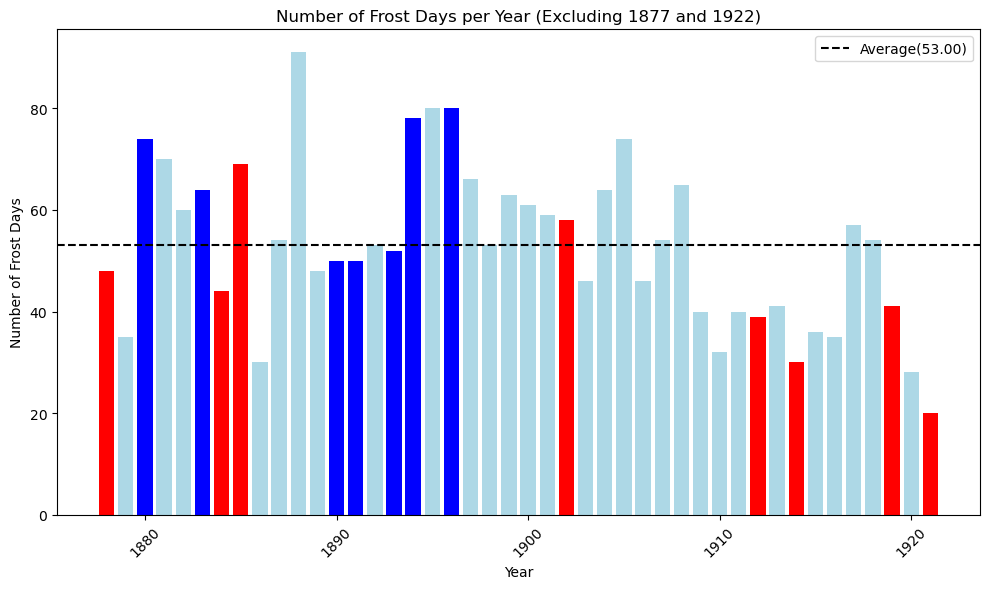

Linear Regression Results for Frost Days:
Slope Estimate: -0.5529245947850598
Slope Error: 0.17236193678356299
R-squared Value: 0.19679941801322717
P-value: 0.002559706545053981


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Remove rows with -99.9 values
filtered_df = df[df['tmin'] != -99.9]

# Remove years 1877 and 1922
filtered_df = filtered_df[(filtered_df['year'] != 1877) & (filtered_df['year'] != 1922)]

# Filter for days where minimum temperature is less than 0°C
frost_days = filtered_df[filtered_df['tmin'] < 0]

# Count the number of frost nights for each year
frost_days_count = frost_days.groupby('year').size()

# Calculate the average value
average_value_frost = frost_days_count.mean()

Hot_Years = [1878, 1884, 1885, 1902, 1912, 1914, 1919, 1921, 1922]
Cold_Years = [1880, 1883, 1890, 1891, 1893, 1894, 1896]

# Plotting
plt.figure(figsize=(10, 6))

# Highlight hot and cold years in the bar graph
bar_colors = ['lightblue' if year not in Hot_Years and year not in Cold_Years else 'red' if year in Hot_Years else 'blue' for year in frost_days_count.index]
plt.bar(frost_days_count.index, frost_days_count.values, color=bar_colors)

plt.axhline(y=average_value_frost, color='black', linestyle='--', label=f'Average({average_value_frost:.2f})')

plt.title('Number of Frost Days per Year (Excluding 1877 and 1922)')
plt.xlabel('Year')
plt.ylabel('Number of Frost Days')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_frost = frost_days_count.index.values
y_frost = frost_days_count.values
slope_frost, intercept_frost, r_value_frost, p_value_frost, std_err_frost = stats.linregress(x_frost, y_frost)

# Calculate R-squared value
r_squared_frost = r_value_frost ** 2

print("Linear Regression Results for Frost Days:")
print(f"Slope Estimate: {slope_frost}")
print(f"Slope Error: {std_err_frost}")
print(f"R-squared Value: {r_squared_frost}")
print(f"P-value: {p_value_frost}")


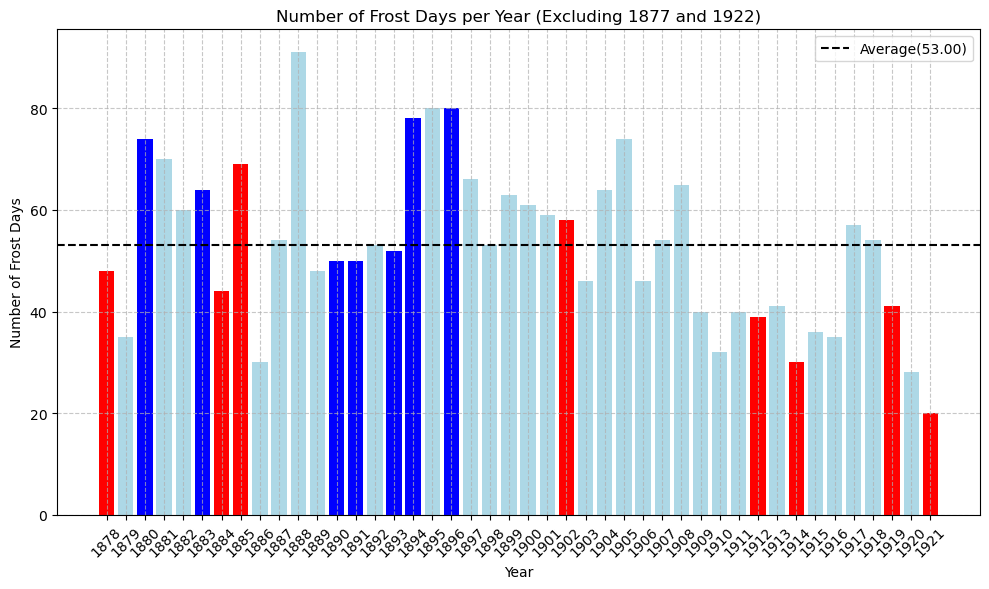

Linear Regression Results for Frost Days:
Slope Estimate: -0.5529245947850598
Slope Error: 0.17236193678356299
R-squared Value: 0.19679941801322717
P-value: 0.002559706545053981


In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Remove rows with -99.9 values
filtered_df = df[df['tmin'] != -99.9]

# Remove years 1877 and 1922
filtered_df = filtered_df[(filtered_df['year'] != 1877) & (filtered_df['year'] != 1922)]

# Filter for days where minimum temperature is less than 0°C
frost_days = filtered_df[filtered_df['tmin'] < 0]

# Count the number of frost nights for each year
frost_days_count = frost_days.groupby('year').size()

# Calculate the average value
average_value_frost = frost_days_count.mean()


Hot_Years = [1878, 1884, 1885, 1902, 1912, 1914, 1919, 1921, 1922]
Cold_Years = [1880, 1883, 1890, 1891, 1893, 1894, 1896]

# Plotting
plt.figure(figsize=(10, 6))
bar_colors = ['lightblue' if year not in Hot_Years and year not in Cold_Years else 'red' if year in Hot_Years else 'blue' for year in frost_days_count.index]
plt.bar(frost_days_count.index, frost_days_count.values, color=bar_colors)

plt.axhline(y=average_value_frost, color='black', linestyle='--', label=f'Average({average_value_frost:.2f})')

plt.title('Number of Frost Days per Year (Excluding 1877 and 1922)')
plt.xlabel('Year')
plt.ylabel('Number of Frost Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xticks(frost_days_count.index, rotation=45)  # Set x-ticks to be the years in the data
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_frost = frost_days_count.index.values
y_frost = frost_days_count.values
slope_frost, intercept_frost, r_value_frost, p_value_frost, std_err_frost = stats.linregress(x_frost, y_frost)

# Calculate R-squared value
r_squared_frost = r_value_frost ** 2

print("Linear Regression Results for Frost Days:")
print(f"Slope Estimate: {slope_frost}")
print(f"Slope Error: {std_err_frost}")
print(f"R-squared Value: {r_squared_frost}")
print(f"P-value: {p_value_frost}")



<Figure size 1000x600 with 0 Axes>

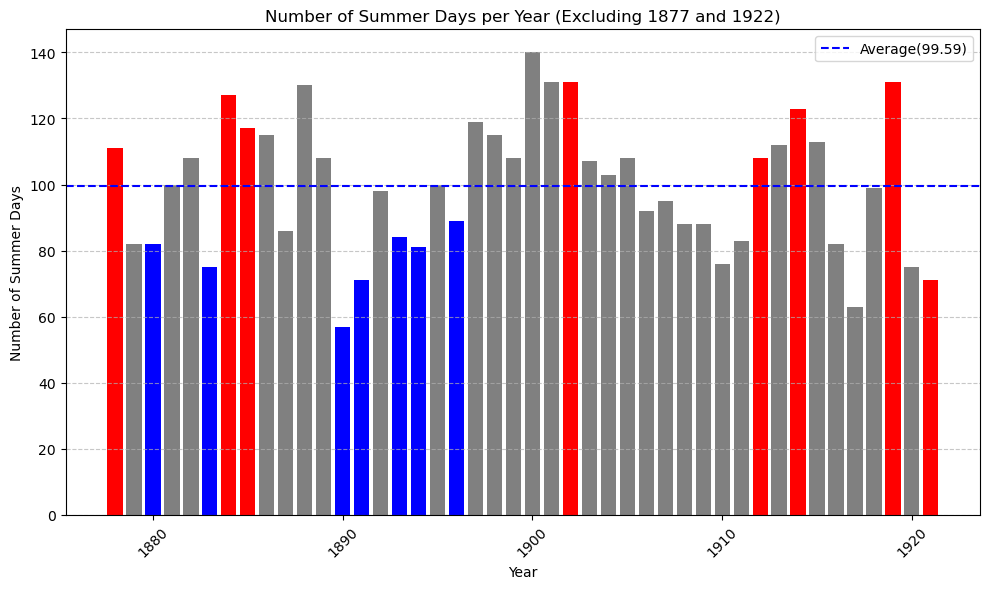

Linear Regression Results for Summer Days:
Slope Estimate: -0.10528541226215647
Slope Error: 0.2441983494124302
R-squared Value: 0.004406398413722156
P-value: 0.6685663190273431


In [24]:
import numpy as np
import scipy.stats as stats

# Remove rows with -99.9 values
filtered_df = df[df['tmax'] != -99.9]

# Remove years 1877 and 1922
filtered_df = filtered_df[(filtered_df['year'] != 1877) & (filtered_df['year'] != 1922)]

# Filter for days where maximum temperature is greater than 25°C
summer_days = filtered_df[filtered_df['tmax'] > 25]

# Count the number of summer days for each year
summer_days_count = summer_days.groupby('year').size()

# Calculate the average value
average_value_summer = summer_days_count.mean()

Hot_Years = [1878, 1884, 1885, 1902, 1912, 1914, 1919, 1921, 1922]
Cold_Years = [1880, 1883, 1890, 1891, 1893, 1894, 1896]



# Plotting
plt.figure(figsize=(10, 6))
bar_colors = ['Grey' if year not in Hot_Years and year not in Cold_Years else 'red' if year in Hot_Years else 'blue' for year in summer_days_count.index]
plt.bar(summer_days_count.index, summer_days_count.values, color=bar_colors)
plt.axhline(y=average_value_summer, color='blue', linestyle='--', label=f'Average({average_value_summer:.2f})')
plt.title('Number of Summer Days per Year (Excluding 1877 and 1922)')
plt.xlabel('Year')
plt.ylabel('Number of Summer Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_summer = summer_days_count.index.values
y_summer = summer_days_count.values
slope_summer, intercept_summer, r_value_summer, p_value_summer, std_err_summer = stats.linregress(x_summer, y_summer)

# Calculate R-squared value
r_squared_summer = r_value_summer ** 2

print("Linear Regression Results for Summer Days:")
print(f"Slope Estimate: {slope_summer}")
print(f"Slope Error: {std_err_summer}")
print(f"R-squared Value: {r_squared_summer}")
print(f"P-value: {p_value_summer}")


      year  month  day  prcp  tmax  tmin
6778  1895      7   24   0.0  -0.1  -2.5


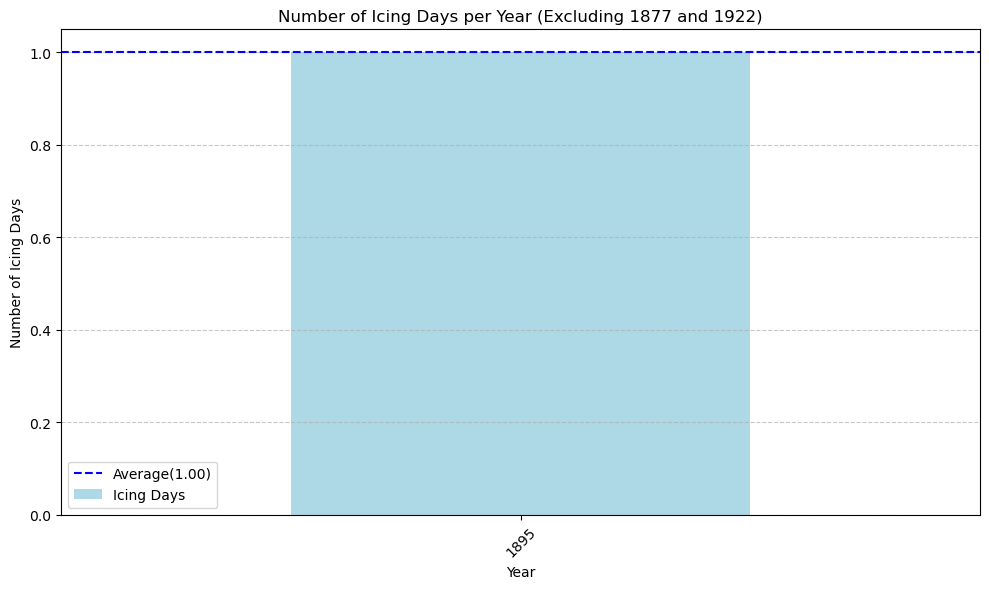

Linear Regression Results for Icing Days:
Slope Estimate: nan
Slope Error: nan
R-squared Value: 0.0
P-value: nan


C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [25]:
import numpy as np
import scipy.stats as stats

# Remove rows with -99.9 values
filtered_df = df[df['tmax'] != -99.9]

# Remove years 1877 and 1922
filtered_df = filtered_df[(filtered_df['year'] != 1877) & (filtered_df['year'] != 1922)]

# Filter for days where maximum temperature is less than 0°C
icing_days = filtered_df[filtered_df['tmax'] < 0]

print(icing_days)

# Count the number of icing days for each year
icing_days_count = icing_days.groupby('year').size()

# Calculate the average value
average_value_icing = icing_days_count.mean()

# Plotting
plt.figure(figsize=(10, 6))
icing_days_count.plot(kind='bar', color='lightblue', label='Icing Days')
plt.axhline(y=average_value_icing, color='blue', linestyle='--', label=f'Average({average_value_icing:.2f})')
plt.title('Number of Icing Days per Year (Excluding 1877 and 1922)')
plt.xlabel('Year')
plt.ylabel('Number of Icing Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_icing = icing_days_count.index.values
y_icing = icing_days_count.values
slope_icing, intercept_icing, r_value_icing, p_value_icing, std_err_icing = stats.linregress(x_icing, y_icing)

# Calculate R-squared value
r_squared_icing = r_value_icing ** 2

print("Linear Regression Results for Icing Days:")
print(f"Slope Estimate: {slope_icing}")
print(f"Slope Error: {std_err_icing}")
print(f"R-squared Value: {r_squared_icing}")
print(f"P-value: {p_value_icing}")


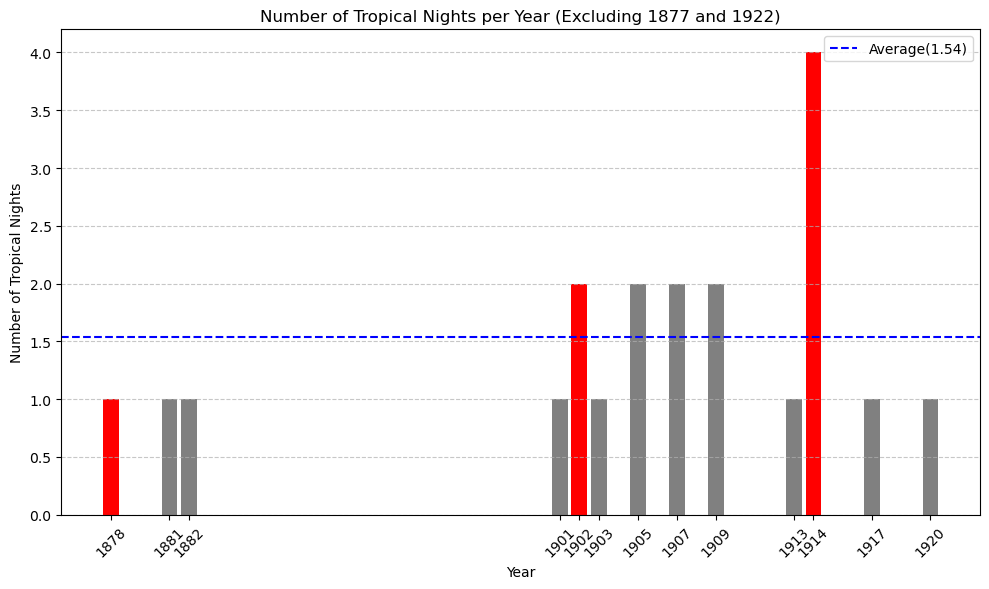

Linear Regression Results for Tropical Nights:
Slope Estimate: 0.02065043894652833
Slope Error: 0.01799995544477339
R-squared Value: 0.1068660215482841
P-value: 0.2756192836135333


In [27]:
import numpy as np
import scipy.stats as stats

# Remove rows with -99.9 values
filtered_df = df[df['tmin'] != -99.9]

# Remove years 1877 and 1922
filtered_df = filtered_df[(filtered_df['year'] != 1877) & (filtered_df['year'] != 1922)]

# Filter for days where minimum temperature is greater than 20°C
tropical_nights = filtered_df[filtered_df['tmin'] > 20]

# Count the number of tropical nights for each year
tropical_nights_count = tropical_nights.groupby('year').size()

# Calculate the average value
average_value_tropical = tropical_nights_count.mean()

Hot_Years = [1878, 1884, 1885, 1902, 1912, 1914, 1919, 1921, 1922]
Cold_Years = [1880, 1883, 1890, 1891, 1893, 1894, 1896]

# Plotting
plt.figure(figsize=(10, 6))
bar_colors = ['Grey' if year not in Hot_Years and year not in Cold_Years else 'red' if year in Hot_Years else 'blue' for year in tropical_nights_count.index]
plt.bar(tropical_nights_count.index, tropical_nights_count.values, color=bar_colors)

plt.axhline(y=average_value_tropical, color='blue', linestyle='--', label=f'Average({average_value_tropical:.2f})')
plt.title('Number of Tropical Nights per Year (Excluding 1877 and 1922)')
plt.xlabel('Year')
plt.ylabel('Number of Tropical Nights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(tropical_nights_count.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate linear regression
x_tropical = tropical_nights_count.index.values
y_tropical = tropical_nights_count.values
slope_tropical, intercept_tropical, r_value_tropical, p_value_tropical, std_err_tropical = stats.linregress(x_tropical, y_tropical)

# Calculate R-squared value
r_squared_tropical = r_value_tropical ** 2

print("Linear Regression Results for Tropical Nights:")
print(f"Slope Estimate: {slope_tropical}")
print(f"Slope Error: {std_err_tropical}")
print(f"R-squared Value: {r_squared_tropical}")
print(f"P-value: {p_value_tropical}")


Growing Season Length (GSL) in days: 1075


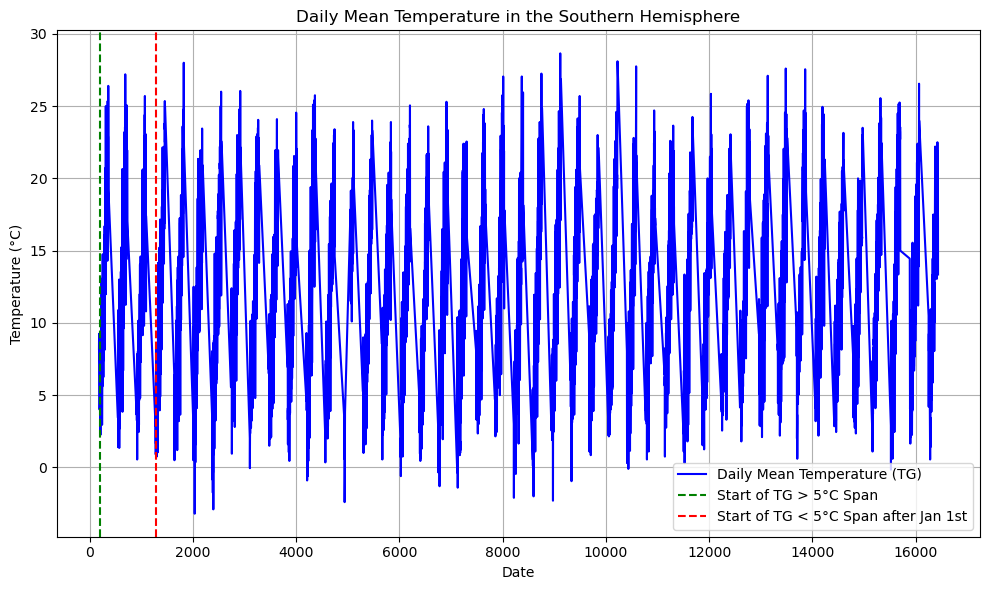

In [10]:
import numpy as np

# Filter for Southern Hemisphere (SH) data
sh_df = df[df['month'] >= 7]  # Considering months from July to December as SH

# Remove rows with -99.9 values
sh_df = sh_df[(sh_df['tmin'] != -99.9) & (sh_df['tmax'] != -99.9)]

# Calculate daily mean temperature (TG)
sh_df['TG'] = (sh_df['tmax'] + sh_df['tmin']) / 2

# Find spans of at least 6 consecutive days with TG > 5°C
sh_df['TG_gt_5'] = sh_df['TG'] > 5
sh_df['TG_gt_5_span'] = sh_df['TG_gt_5'].astype(int).groupby((~sh_df['TG_gt_5']).cumsum()).cumsum()
first_gt_5_span_start = sh_df[sh_df['TG_gt_5_span'] == 6].index.min()

# Find spans of at least 6 consecutive days with TG < 5°C after January 1st
sh_df_after_jan = sh_df[sh_df['month'] >= 1]  # Consider months from January to December after January
sh_df_after_jan['TG_lt_5'] = sh_df_after_jan['TG'] < 5
sh_df_after_jan['TG_lt_5_span'] = sh_df_after_jan['TG_lt_5'].astype(int).groupby((~sh_df_after_jan['TG_lt_5']).cumsum()).cumsum()
first_lt_5_span_start = sh_df_after_jan[sh_df_after_jan['TG_lt_5_span'] == 6].index.min()

# Calculate Growing Season Length (GSL)
if first_gt_5_span_start is not None and first_lt_5_span_start is not None:
    gsl = first_lt_5_span_start - first_gt_5_span_start
else:
    gsl = np.nan

print("Growing Season Length (GSL) in days:", gsl)

import matplotlib.pyplot as plt

# Plot daily mean temperature (TG)
plt.figure(figsize=(10, 6))
plt.plot(sh_df.index, sh_df['TG'], color='blue', label='Daily Mean Temperature (TG)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Mean Temperature in the Southern Hemisphere')
plt.grid(True)

# Mark the start of the first span with TG > 5°C
if first_gt_5_span_start is not None:
    plt.axvline(x=first_gt_5_span_start, color='green', linestyle='--', label='Start of TG > 5°C Span')

# Mark the start of the first span with TG < 5°C after January 1st
if first_lt_5_span_start is not None:
    plt.axvline(x=first_lt_5_span_start, color='red', linestyle='--', label='Start of TG < 5°C Span after Jan 1st')

plt.legend()
plt.tight_layout()
plt.show()


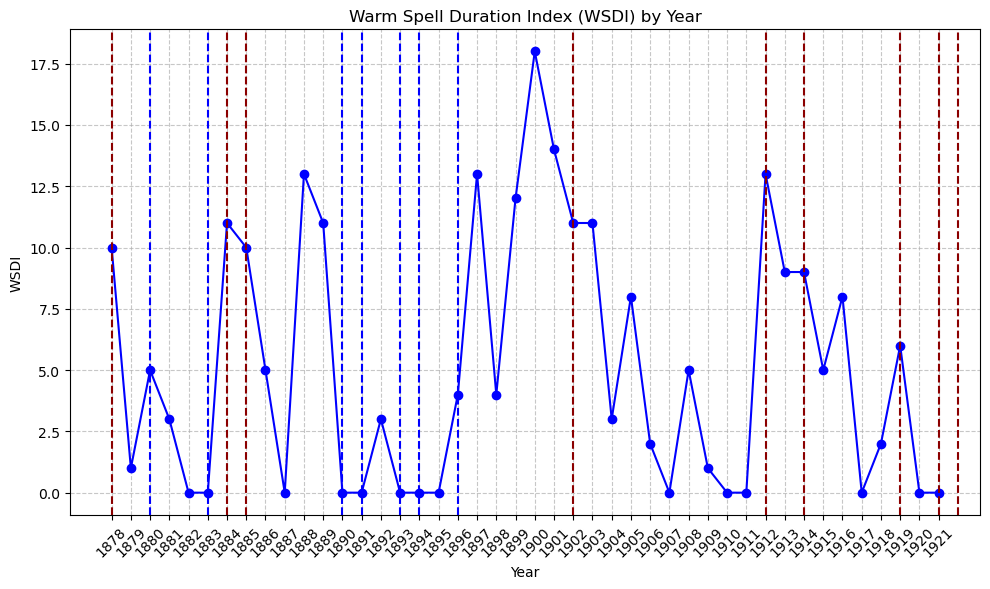

In [28]:
import matplotlib.pyplot as plt

# Filter out rows with Tmax values equal to -99.9, and exclude years 1877 and 1922
filtered_df = df[(df['tmax'] != -99.9) & (~df['year'].isin([1877, 1922]))]

# Calculate the 90th percentile of daily maximum temperature
TXin90 = filtered_df['tmax'].quantile(0.9)

# Calculate consecutive days where TX > 90th percentile
consecutive_days = filtered_df['tmax'] > TXin90
consecutive_days = consecutive_days.astype(int).groupby((consecutive_days != consecutive_days.shift()).cumsum()).cumsum()

# Count days with at least 6 consecutive days where TX > 90th percentile for each year
WSDI_per_year = consecutive_days.groupby(filtered_df['year']).apply(lambda x: (x >= 6).sum())

Hot_Years = [1878, 1884, 1885, 1902, 1912, 1914, 1919, 1921, 1922]
Cold_Years = [1880, 1883, 1890, 1891, 1893, 1894, 1896]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(WSDI_per_year.index, WSDI_per_year.values, marker='o', linestyle='-', color='blue')
plt.title('Warm Spell Duration Index (WSDI) by Year')
plt.xlabel('Year')
plt.ylabel('WSDI')

# Highlight gridlines for wet years in blue
for year in Cold_Years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in Hot_Years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)
    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Set x-axis ticks to display all years
plt.xticks(range(min(WSDI_per_year.index), max(WSDI_per_year.index) + 1), rotation=45)

plt.tight_layout()
plt.show()


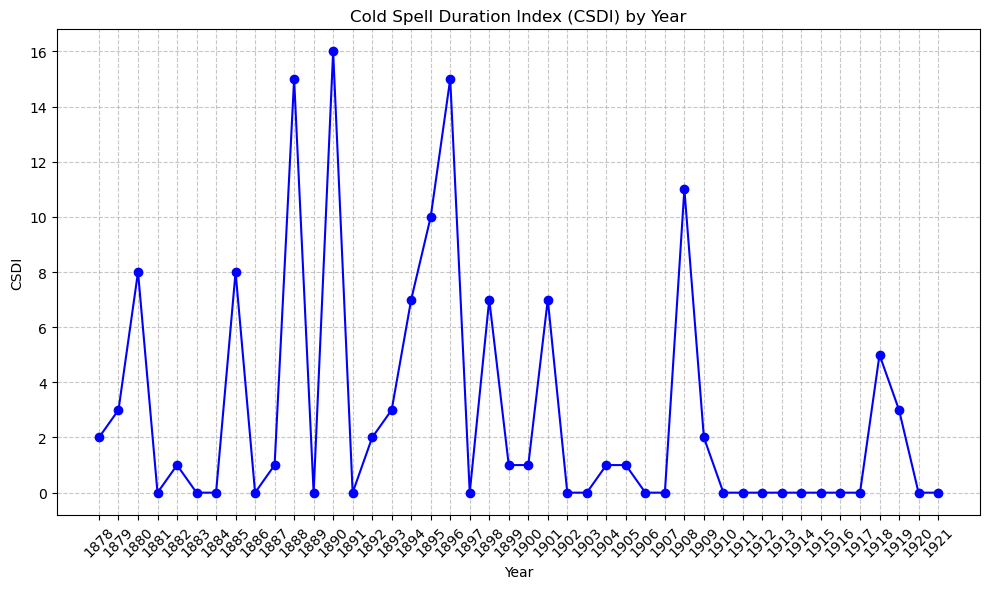

In [12]:

import matplotlib.pyplot as plt

# Filter out rows with Tmin values equal to -99.9, and exclude years 1877 and 1922
filtered_df = df[(df['tmin'] != -99.9) & (~df['year'].isin([1877, 1922]))]

# Calculate the 10th percentile of daily minimum temperature
TNin10 = filtered_df['tmin'].quantile(0.1)

# Calculate consecutive days where TN < 10th percentile
consecutive_days = filtered_df['tmin'] < TNin10
consecutive_days = consecutive_days.astype(int).groupby((consecutive_days != consecutive_days.shift()).cumsum()).cumsum()

# Count days with at least 6 consecutive days where TN < 10th percentile for each year
CSDI_per_year = consecutive_days.groupby(filtered_df['year']).apply(lambda x: (x >= 6).sum())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(CSDI_per_year.index, CSDI_per_year.values, marker='o', linestyle='-', color='blue')
plt.title('Cold Spell Duration Index (CSDI) by Year')
plt.xlabel('Year')
plt.ylabel('CSDI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Set x-axis ticks to display all years
plt.xticks(range(min(CSDI_per_year.index), max(CSDI_per_year.index) + 1), rotation=45)

plt.tight_layout()
plt.show()


C:\Users\manda\AppData\Local\Temp\ipykernel_13752\2343515715.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['daily_mean_temp'] = (cleaned_df['tmax'] + cleaned_df['tmin']) / 2


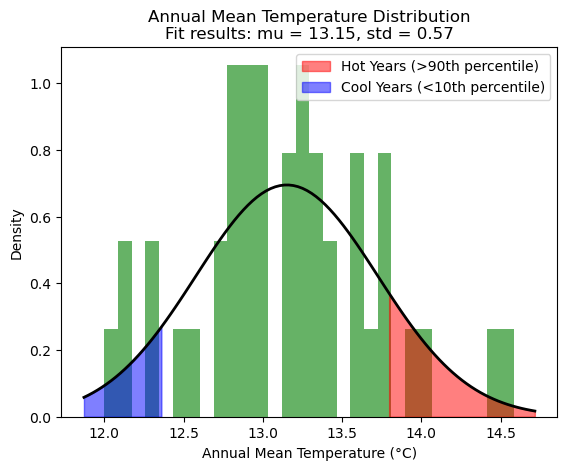

Hot Years (Annual Mean Temperature > 90th percentile):
Int64Index([1878, 1902, 1912, 1914, 1919], dtype='int64', name='year')

Cool Years (Annual Mean Temperature < 10th percentile):
Int64Index([1883, 1891, 1893, 1894, 1896], dtype='int64', name='year')

Temperature thresholds:
90th percentile: 13.79°C
10th percentile: 12.37°C


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'df' is your DataFrame

# Filter out rows with -99.9 values, and exclude years 1877 and 1922
cleaned_df = df[(df['tmax'] != -99.9) & (df['tmin'] != -99.9) & (df['year'] != 1877) & (df['year'] != 1922)]

# Calculate daily mean temperature
cleaned_df['daily_mean_temp'] = (cleaned_df['tmax'] + cleaned_df['tmin']) / 2

# Calculate annual mean temperature for each year
annual_mean_temp = cleaned_df.groupby('year')['daily_mean_temp'].mean()

# Step 1: Plot Gaussian Distribution
mu, std = norm.fit(annual_mean_temp)

# Plot the histogram
plt.hist(annual_mean_temp, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Annual Mean Temperature Distribution\nFit results: mu = %.2f, std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Density')

# Step 2 & 3: Identify hot and cool years based on percentiles and plot
percentile_90th = np.percentile(annual_mean_temp, 90)
percentile_10th = np.percentile(annual_mean_temp, 10)

hot_years = annual_mean_temp[annual_mean_temp > percentile_90th].index
cool_years = annual_mean_temp[annual_mean_temp < percentile_10th].index

# Highlighting areas for hot and cool years
plt.fill_between(x, 0, p, where=(x > percentile_90th), color='red', alpha=0.5, label='Hot Years (>90th percentile)')
plt.fill_between(x, 0, p, where=(x < percentile_10th), color='blue', alpha=0.5, label='Cool Years (<10th percentile)')

plt.legend()
plt.show()

# Printing hot and cool years
print("Hot Years (Annual Mean Temperature > 90th percentile):")
print(hot_years)

print("\nCool Years (Annual Mean Temperature < 10th percentile):")
print(cool_years)

# Printing threshold values
print("\nTemperature thresholds:")
print(f"90th percentile: {percentile_90th:.2f}°C")
print(f"10th percentile: {percentile_10th:.2f}°C")


Hot Years:
Int64Index([1878, 1884, 1885, 1902, 1912, 1914, 1919, 1921, 1922], dtype='int64', name='year')

Cold Years:
Int64Index([1880, 1883, 1890, 1891, 1893, 1894, 1896], dtype='int64', name='year')


C:\Users\manda\AppData\Local\Temp\ipykernel_13752\1759316525.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['daily_mean_temp'] = (cleaned_df['tmax'] + cleaned_df['tmin']) / 2


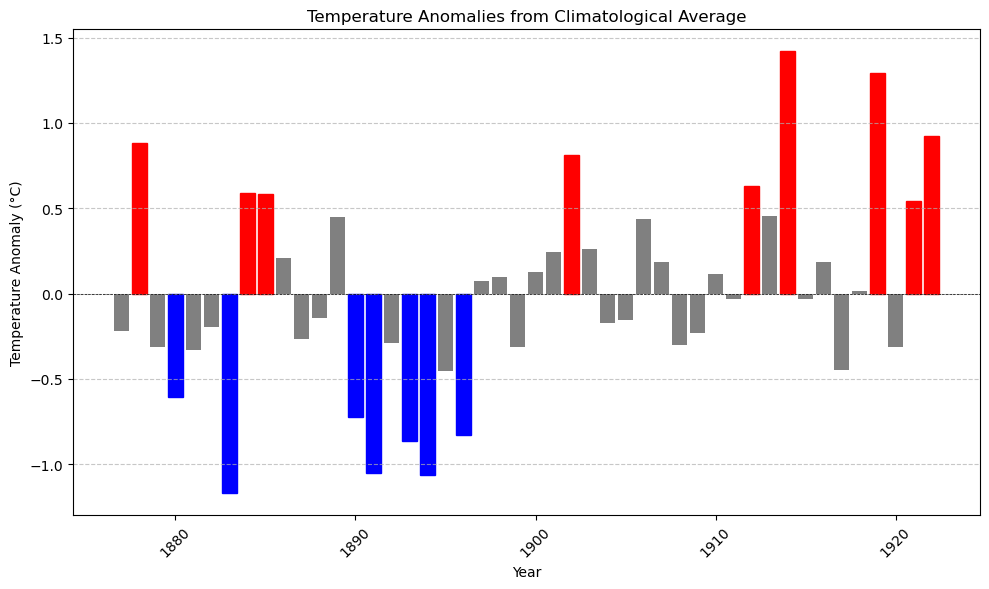

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing temperature data

# Exclude rows with -99.9 values for both tmax and tmin
cleaned_df = df[(df['tmax'] != -99.9) & (df['tmin'] != -99.9)]

# Calculate daily mean temperature
cleaned_df['daily_mean_temp'] = (cleaned_df['tmax'] + cleaned_df['tmin']) / 2

# Calculate annual average temperature
annual_avg_temp = cleaned_df.groupby('year')['daily_mean_temp'].mean()

# Calculate temperature anomalies compared to the climatological average 
climatological_avg = annual_avg_temp.mean()
temperature_anomalies = annual_avg_temp - climatological_avg

# Define thresholds for hot and cold years
hot_threshold = 0.5
cold_threshold = -0.5

# Identify hot and cold years based on temperature anomalies
hot_years = temperature_anomalies[temperature_anomalies > hot_threshold].index
cold_years = temperature_anomalies[temperature_anomalies < cold_threshold].index

# Print hot and cold years
print("Hot Years:")
print(hot_years)
print("\nCold Years:")
print(cold_years)

# Plotting
plt.figure(figsize=(10, 6))

# Plot gray bars for all years
bars = plt.bar(temperature_anomalies.index, temperature_anomalies.values, color='gray')

# Highlight hot and cold years
for bar in bars:
    year = bar.get_height()
    if year > hot_threshold:
        bar.set_color('red')  # Red for hot years
    elif year < cold_threshold:
        bar.set_color('blue')  # Blue for cold years

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0 for reference
plt.title('Temperature Anomalies from Climatological Average')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


     Year  Month  Rx1day
0    1878      1    13.2
1    1878      2    75.4
2    1878      3    27.4
3    1878      4     7.6
4    1878      5    15.7
..    ...    ...     ...
523  1921      8    11.4
524  1921      9    24.4
525  1921     10    31.5
526  1921     11    16.5
527  1921     12    53.1

[528 rows x 3 columns]


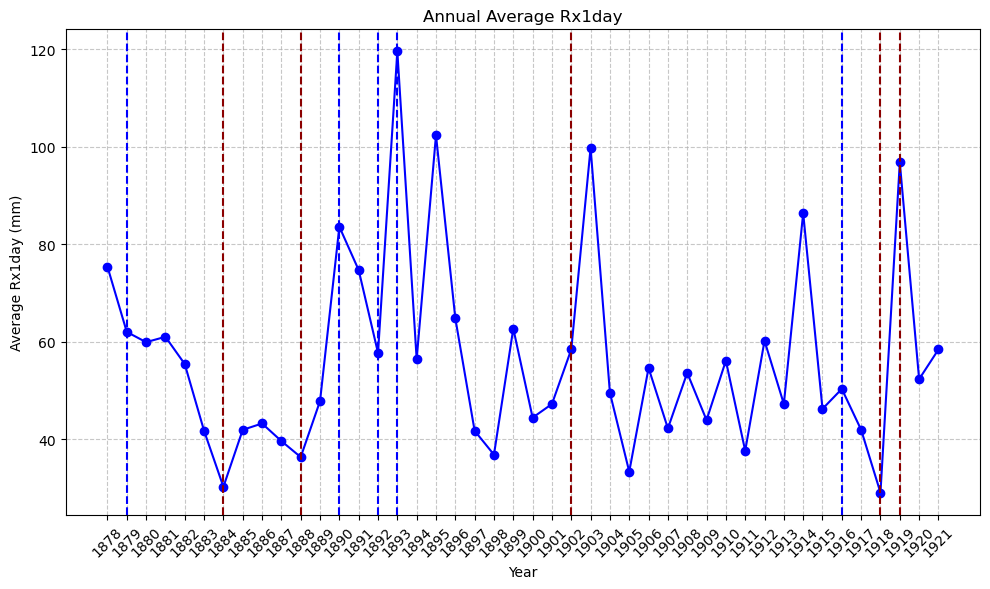

In [15]:
# Assuming 'df' is your DataFrame

# Filter out rows with missing precipitation values (-99.9)
cleaned_df = df[(df['prcp'] != -99.9) & (df['year'] != 1877) & (df['year'] != 1922)]

# Group data by year and month, and find the maximum precipitation for each month
monthly_max_precipitation = cleaned_df.groupby(['year', 'month'])['prcp'].max()

# Reset index to make it easier to work with the DataFrame
monthly_max_precipitation = monthly_max_precipitation.reset_index()

# Rename the columns for clarity
monthly_max_precipitation.columns = ['Year', 'Month', 'Rx1day']

# Print the DataFrame showing the monthly maximum 1-day precipitation
print(monthly_max_precipitation)

# Group data by year and month, and find the maximum precipitation for each month
monthly_max_precipitation = cleaned_df.groupby(['year', 'month'])['prcp'].max()

# Calculate annual average Rx1day by averaging the monthly maximum precipitation values for each year
annual_avg_rx1day = monthly_max_precipitation.groupby('year').max()

# Reset index to make it easier to work with the DataFrame
annual_avg_rx1day = annual_avg_rx1day.reset_index()

# Wet years (above 90th percentile)
wet_years = [1879, 1890, 1892, 1893, 1916]

# Dry years (below 10th percentile)
dry_years = [1884, 1888, 1902, 1918, 1919]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_rx1day['year'], annual_avg_rx1day['prcp'], marker='o', linestyle='-', color='blue')
plt.title('Annual Average Rx1day')
plt.xlabel('Year')
plt.ylabel('Average Rx1day (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)

# Explicitly set x-axis ticks for all years
plt.xticks(annual_avg_rx1day['year'], rotation=45)
plt.tight_layout()
plt.show()




C:\Users\manda\AppData\Local\Temp\ipykernel_13752\851405060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['5_day_interval'] = cleaned_df['day'] // 5  # Assuming 'day' starts from 1


year  month
1878  1        13.2
      2        93.4
      3        40.6
      4         8.9
      5        26.9
               ... 
1921  8        11.4
      9        55.2
      10       57.9
      11       48.5
      12       91.2
Name: prcp, Length: 528, dtype: float64


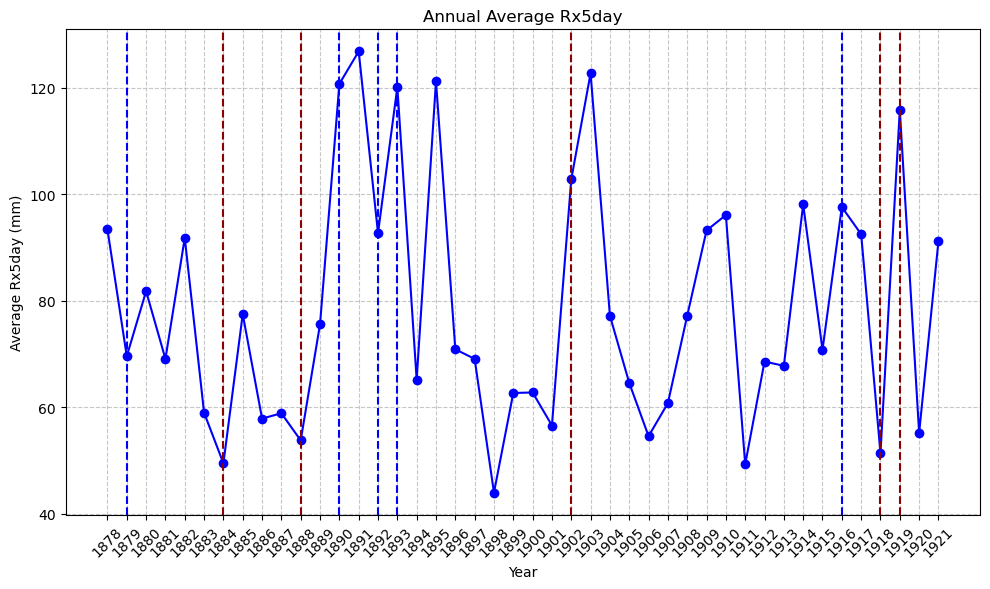

In [16]:
# Assuming 'df' is your DataFrame

# Filter out rows with missing precipitation values (-99.9), and exclude years 1877 and 1922
cleaned_df = df[(df['prcp'] != -99.9) & (df['year'] != 1877) & (df['year'] != 1922)]

# Group data by year and month, and find the maximum precipitation for each 5-day interval
cleaned_df['5_day_interval'] = cleaned_df['day'] // 5  # Assuming 'day' starts from 1
max_5_day_precipitation = cleaned_df.groupby(['year', 'month', '5_day_interval'])['prcp'].sum()

# Calculate monthly maximum consecutive 5-day precipitation (Rx5day)
monthly_max_5day_precipitation = max_5_day_precipitation.groupby(['year', 'month']).max()

print(monthly_max_5day_precipitation)

# Calculate annual average Rx5day by averaging the monthly maximum consecutive 5-day precipitation values for each year
annual_avg_rx5day = monthly_max_5day_precipitation.groupby('year').max()

# Reset index to make it easier to work with the DataFrame
annual_avg_rx5day = annual_avg_rx5day.reset_index()

# Wet years (above 90th percentile)
wet_years = [1879, 1890, 1892, 1893, 1916]

# Dry years (below 10th percentile)
dry_years = [1884, 1888, 1902, 1918, 1919]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_rx5day['year'], annual_avg_rx5day['prcp'], marker='o', linestyle='-', color='blue')
plt.title('Annual Average Rx5day')
plt.xlabel('Year')
plt.ylabel('Average Rx5day (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)

# Explicitly set x-axis ticks for all years
plt.xticks(annual_avg_rx5day['year'], rotation=45)
plt.tight_layout()
plt.show()


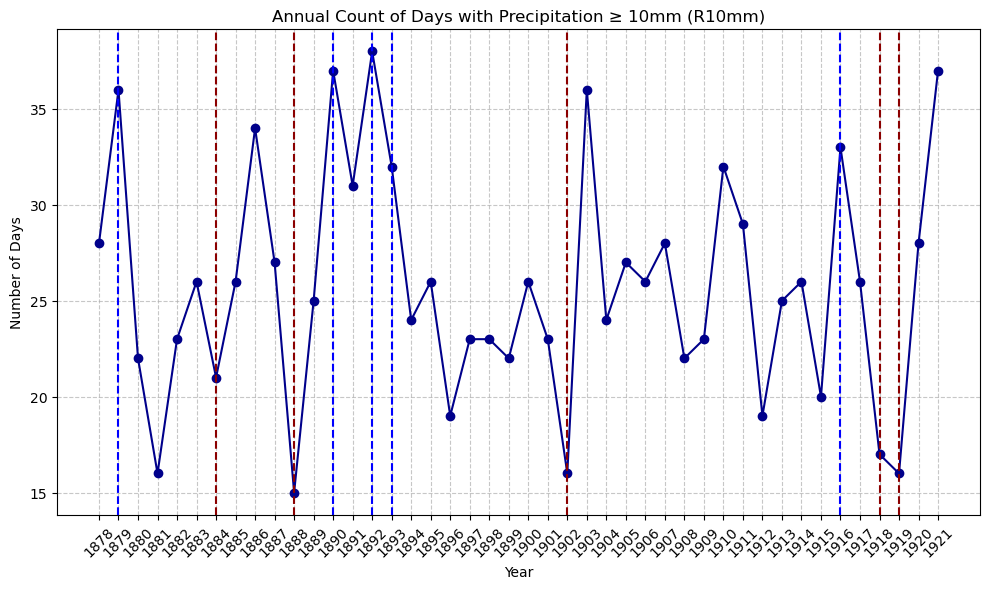

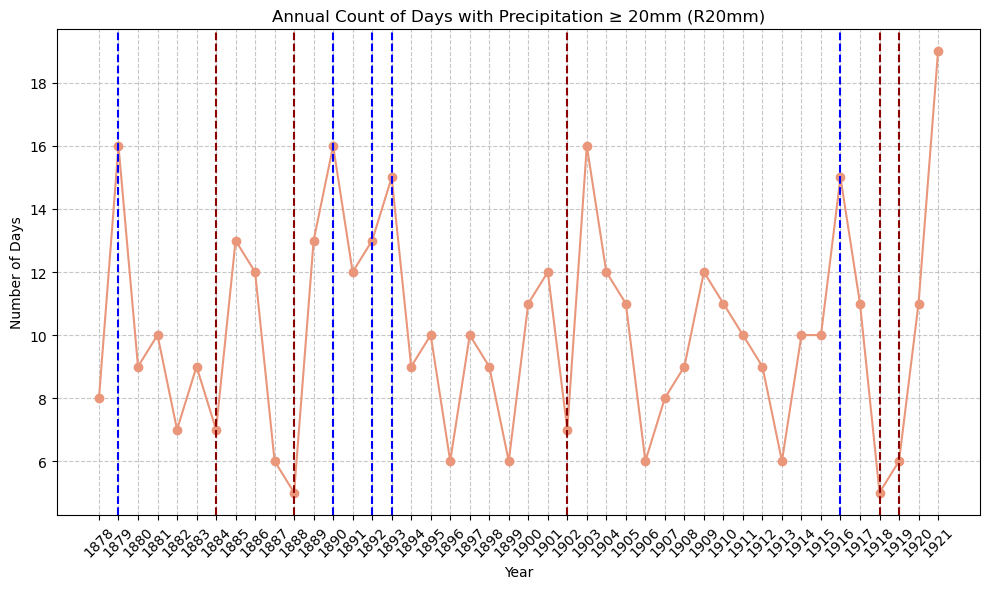

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Filter out rows with missing precipitation values or below the threshold, and exclude years 1877 and 1922
threshold_10mm_df = df[(df['prcp'] >= 10) & (df['prcp'] != -99.9) & (~df['year'].isin([1877, 1922]))]
threshold_20mm_df = df[(df['prcp'] >= 20) & (df['prcp'] != -99.9) & (~df['year'].isin([1877, 1922]))]

# Count the number of days where precipitation is equal to or exceeds the threshold for each year
R10mm_count = threshold_10mm_df.groupby('year').size()
R20mm_count = threshold_20mm_df.groupby('year').size()

# Wet years (above 90th percentile)
wet_years = [1879, 1890, 1892, 1893, 1916]

# Dry years (below 10th percentile)
dry_years = [1884, 1888, 1902, 1918, 1919]


# Plotting R10mm
plt.figure(figsize=(10, 6))
plt.plot(R10mm_count.index, R10mm_count.values, marker='o', linestyle='-', color='Darkblue')
plt.title('Annual Count of Days with Precipitation ≥ 10mm (R10mm)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)


plt.xticks(R10mm_count.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()

# Plotting R20mm
plt.figure(figsize=(10, 6))
plt.plot(R20mm_count.index, R20mm_count.values, marker='o', linestyle='-', color='Darksalmon')
plt.title('Annual Count of Days with Precipitation ≥ 20mm (R20mm)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)
    
plt.xticks(R20mm_count.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Sample DataFrame
# Assuming 'df' is your DataFrame with columns 'year', 'month', 'day', and 'prcp'

# Filter out rows with missing precipitation values (-99.9), and exclude years 1877 and 1922
cleaned_df = df[(df['prcp'] != -99.9) & (~df['year'].isin([1877, 1922]))]

# Function to calculate maximum length of dry spell (CDD)
def calculate_cdd(data):
    max_cdd = 0
    current_cdd = 0
    for prcp in data:
        if prcp < 1:  # If precipitation is below 1mm
            current_cdd += 1
            max_cdd = max(max_cdd, current_cdd)
        else:
            current_cdd = 0
    return max_cdd

# Function to calculate maximum length of wet spell (CWD)
def calculate_cwd(data):
    max_cwd = 0
    current_cwd = 0
    for prcp in data:
        if prcp >= 1:  # If precipitation is 1mm or above
            current_cwd += 1
            max_cwd = max(max_cwd, current_cwd)
        else:
            current_cwd = 0
    return max_cwd

# Calculate CDD and CWD for each year
cdd_results = cleaned_df.groupby('year')['prcp'].agg(calculate_cdd)
cwd_results = cleaned_df.groupby('year')['prcp'].agg(calculate_cwd)

# Print the results
print("Maximum Length of Dry Spell (CDD) by Year:")
print(cdd_results)
print("\nMaximum Length of Wet Spell (CWD) by Year:")
print(cwd_results)


Maximum Length of Dry Spell (CDD) by Year:
year
1878    29
1879    16
1880    21
1881    32
1882    23
1883    27
1884    20
1885    22
1886    14
1887    20
1888    37
1889    10
1890    19
1891    17
1892    17
1893    15
1894    17
1895    31
1896    18
1897    51
1898    36
1899    27
1900    27
1901    24
1902    31
1903    29
1904    25
1905    14
1906    23
1907    21
1908    26
1909    19
1910    21
1911    23
1912    30
1913    22
1914    37
1915    31
1916    26
1917    21
1918    42
1919    31
1920    23
1921    30
Name: prcp, dtype: int64

Maximum Length of Wet Spell (CWD) by Year:
year
1878     6
1879     6
1880     5
1881     6
1882     5
1883     5
1884     6
1885     4
1886     6
1887     9
1888     3
1889     5
1890     9
1891     9
1892     5
1893     4
1894    13
1895     5
1896     5
1897     6
1898     4
1899     5
1900     5
1901     5
1902     4
1903     4
1904     7
1905     4
1906     5
1907     5
1908     5
1909     5
1910     6
1911     5
1912     4
1913     

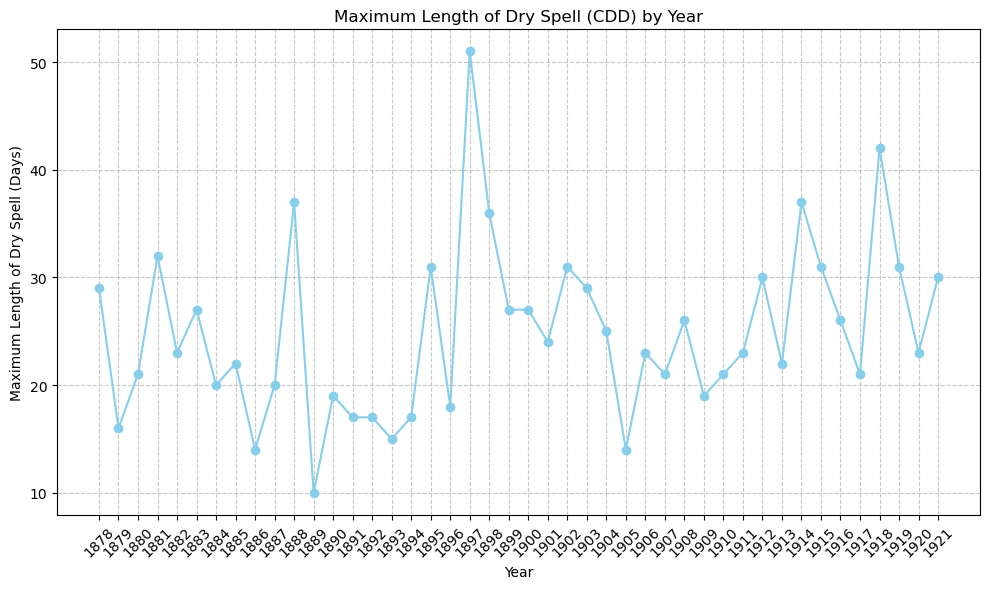

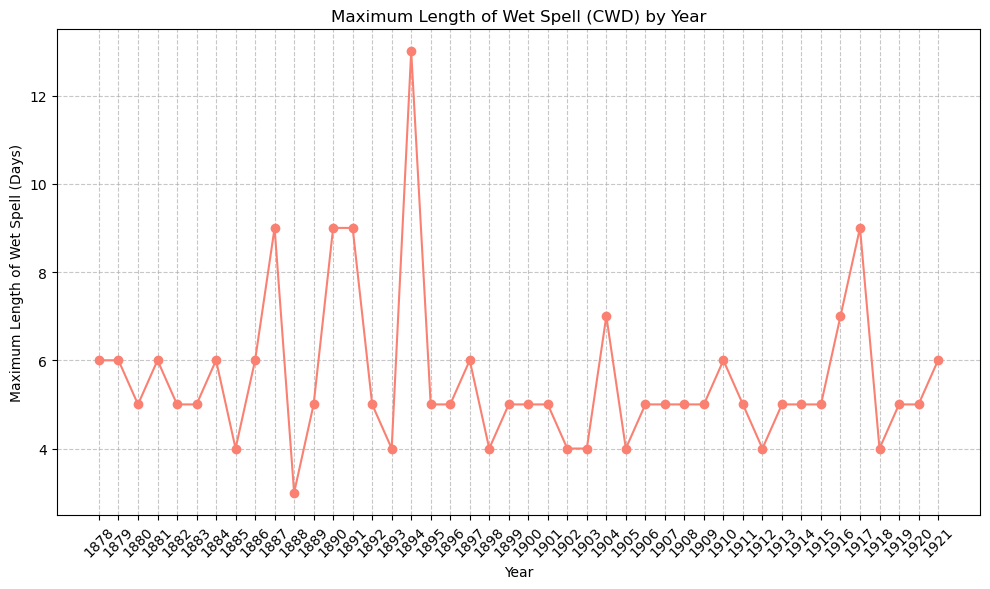

In [19]:
import matplotlib.pyplot as plt

# Plotting CDD
plt.figure(figsize=(10, 6))
plt.plot(cdd_results.index, cdd_results.values, marker='o', linestyle='-', color='skyblue')
plt.title('Maximum Length of Dry Spell (CDD) by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Length of Dry Spell (Days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines on x-axis
plt.xticks(cdd_results.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()

# Plotting CWD
plt.figure(figsize=(10, 6))
plt.plot(cwd_results.index, cwd_results.values, marker='o', linestyle='-', color='salmon')
plt.title('Maximum Length of Wet Spell (CWD) by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Length of Wet Spell (Days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines on x-axis
plt.xticks(cwd_results.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()


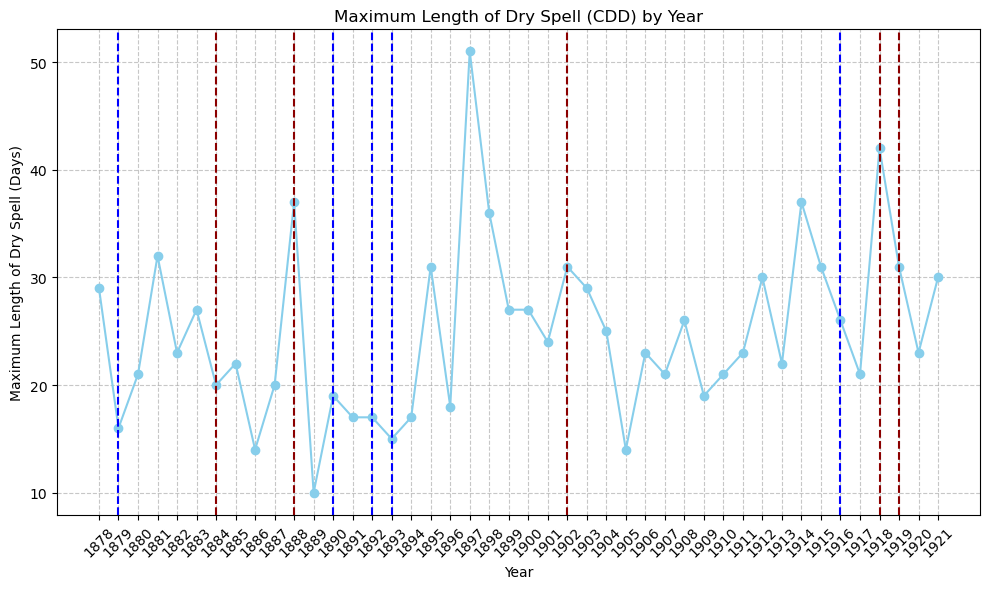

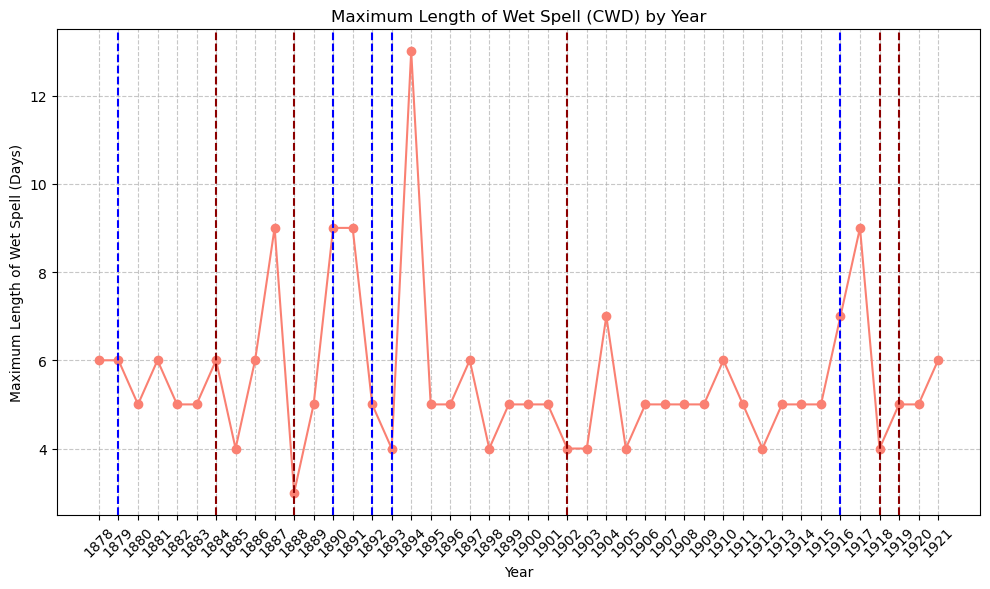

In [20]:
import matplotlib.pyplot as plt

# Wet years (above 90th percentile)
wet_years = [1879, 1890, 1892, 1893, 1916]

# Dry years (below 10th percentile)
dry_years = [1884, 1888, 1902, 1918, 1919]

# Plotting CDD
plt.figure(figsize=(10, 6))
plt.plot(cdd_results.index, cdd_results.values, marker='o', linestyle='-', color='skyblue')
plt.title('Maximum Length of Dry Spell (CDD) by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Length of Dry Spell (Days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines on x-axis

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)

plt.xticks(cdd_results.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()

# Plotting CWD
plt.figure(figsize=(10, 6))
plt.plot(cwd_results.index, cwd_results.values, marker='o', linestyle='-', color='salmon')
plt.title('Maximum Length of Wet Spell (CWD) by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Length of Wet Spell (Days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines on x-axis

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)

plt.xticks(cwd_results.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()


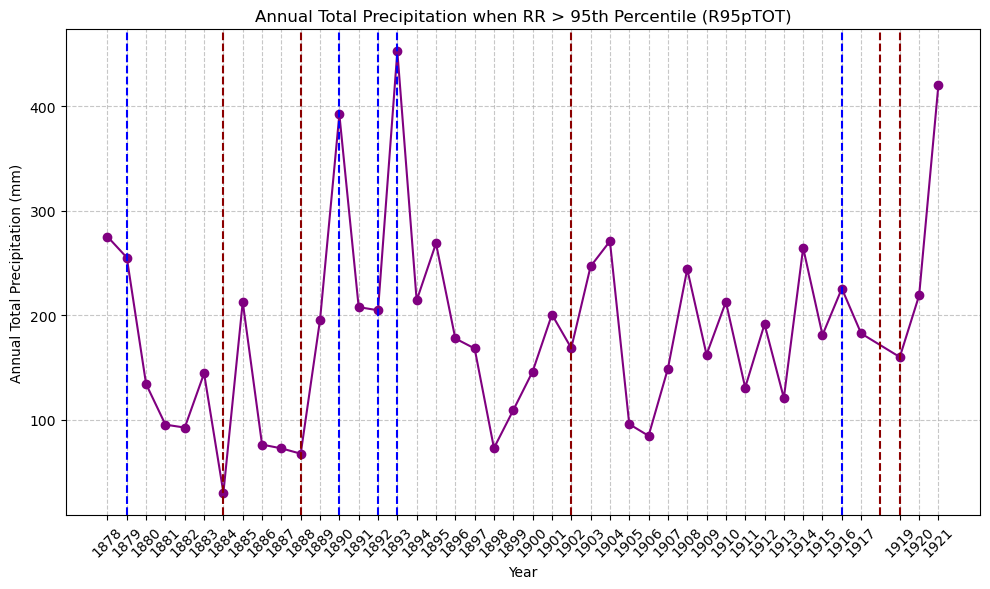

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Filter out rows with missing precipitation values or below the threshold, and exclude years 1877 and 1922
cleaned_df = df[(df['prcp'] >= 1.0) & (df['prcp'] != -99.9) & (~df['year'].isin([1877, 1922]))]

# Calculate the 95th percentile of precipitation on wet days for the period
percentile_95th = np.percentile(cleaned_df['prcp'], 95)

# Filter wet days where precipitation exceeds the 95th percentile
wet_days_exceeding_95th = cleaned_df[cleaned_df['prcp'] > percentile_95th]

# Group by year and calculate the annual total precipitation when precipitation exceeds the 95th percentile
R95pTOT = wet_days_exceeding_95th.groupby('year')['prcp'].sum()

# Wet years (above 90th percentile)
wet_years = [1879, 1890, 1892, 1893, 1916]

# Dry years (below 10th percentile)
dry_years = [1884, 1888, 1902, 1918, 1919]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(R95pTOT.index, R95pTOT.values, marker='o', linestyle='-', color='purple')
plt.title('Annual Total Precipitation when RR > 95th Percentile (R95pTOT)')
plt.xlabel('Year')
plt.ylabel('Annual Total Precipitation (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)

plt.xticks(R95pTOT.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()


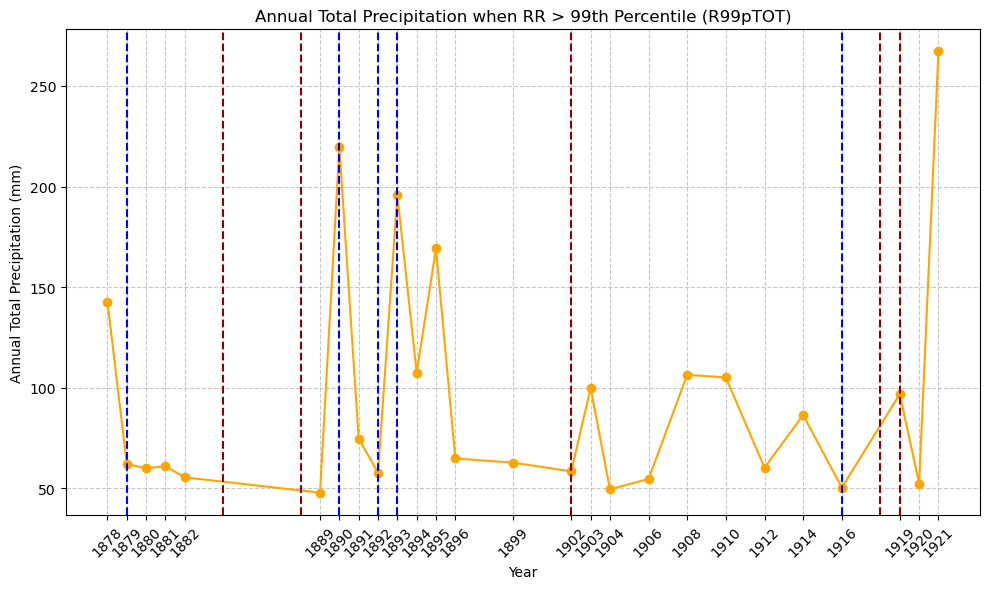

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Filter out rows with missing precipitation values or below the threshold, and exclude years 1877 and 1922
cleaned_df = df[(df['prcp'] >= 1.0) & (df['prcp'] != -99.9) & (~df['year'].isin([1877, 1922]))]

# Calculate the 99th percentile of precipitation on wet days for the period
percentile_99th = np.percentile(cleaned_df['prcp'], 99)

# Filter wet days where precipitation exceeds the 99th percentile
wet_days_exceeding_99th = cleaned_df[cleaned_df['prcp'] > percentile_99th]

# Group by year and calculate the annual total precipitation when precipitation exceeds the 99th percentile
R99pTOT = wet_days_exceeding_99th.groupby('year')['prcp'].sum()

# Wet years (above 90th percentile)
wet_years = [1879, 1890, 1892, 1893, 1916]

# Dry years (below 10th percentile)
dry_years = [1884, 1888, 1902, 1918, 1919]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(R99pTOT.index, R99pTOT.values, marker='o', linestyle='-', color='orange')
plt.title('Annual Total Precipitation when RR > 99th Percentile (R99pTOT)')
plt.xlabel('Year')
plt.ylabel('Annual Total Precipitation (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)

plt.xticks(R99pTOT.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()


year
1878     9.161290
1879     9.215079
1880     8.717105
1881     8.652174
1882     7.853846
1883     8.222340
1884     7.590909
1885     9.921795
1886     9.188421
1887     6.799138
1888     8.840000
1889     8.200000
1890     9.687402
1891     9.102885
1892    10.143689
1893    10.676699
1894     7.807547
1895    10.844595
1896     7.565957
1897     9.044595
1898     8.629412
1899     9.235443
1900     8.588172
1901     8.873418
1902     8.411111
1903    11.965432
1904     9.557647
1905     8.196471
1906     8.385057
1907     7.870297
1908     8.989157
1909     8.796512
1910    10.385714
1911     8.609278
1912     8.523377
1913     9.249315
1914     9.754651
1915     8.812658
1916     9.540909
1917     9.544318
1918     7.418750
1919     8.618750
1920     8.665979
1921    12.506593
dtype: float64


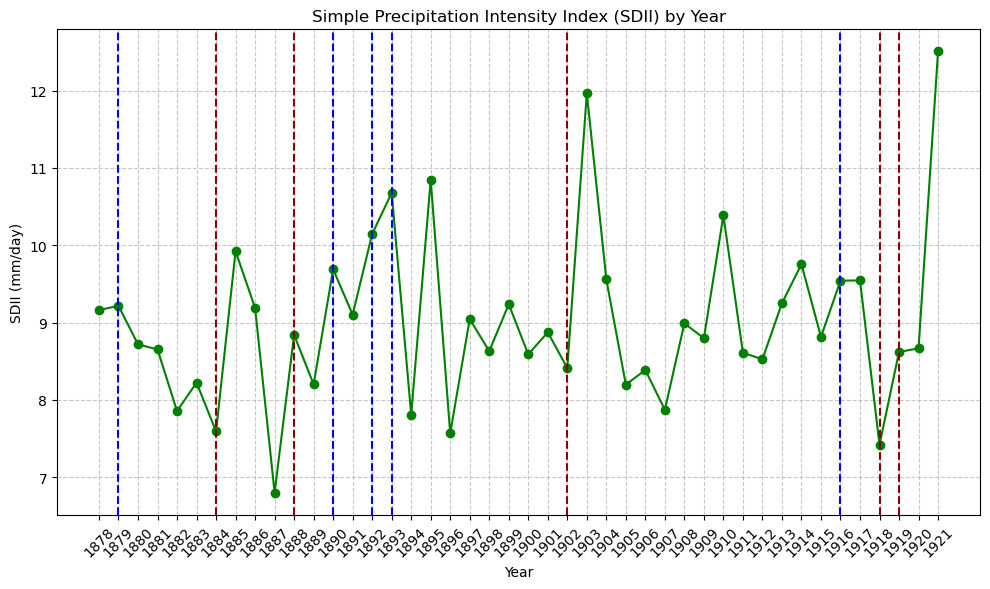

In [23]:
import pandas as pd

# Assuming 'df' is your DataFrame containing precipitation data

# Filter out rows with missing precipitation values (-99.9) and exclude years 1877 and 1922
cleaned_df = df[(df['prcp'] != -99.9) & (~df['year'].isin([1877, 1922]))]

# Identify wet days (RR >= 1mm)
wet_days = cleaned_df[cleaned_df['prcp'] >= 1]

# Group data by year and calculate SDII for each year
sdii_results = wet_days.groupby('year')['prcp'].sum() / wet_days.groupby('year').size()

# Print SDII results
print(sdii_results)

# Wet years (above 90th percentile)
wet_years = [1879, 1890, 1892, 1893, 1916]

# Dry years (below 10th percentile)
dry_years = [1884, 1888, 1902, 1918, 1919]

import matplotlib.pyplot as plt

# Plotting SDII
plt.figure(figsize=(10, 6))
plt.plot(sdii_results.index, sdii_results.values, marker='o', linestyle='-', color='green')
plt.title('Simple Precipitation Intensity Index (SDII) by Year')
plt.xlabel('Year')
plt.ylabel('SDII (mm/day)')
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Highlight gridlines for wet years in blue
for year in wet_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=1)

# Highlight gridlines for dry years in dark red
for year in dry_years:
    plt.axvline(x=year, color='darkred', linestyle='--', alpha=1)
    
plt.xticks(sdii_results.index, rotation=45)  # Show all years on x-axis
plt.tight_layout()
plt.show()


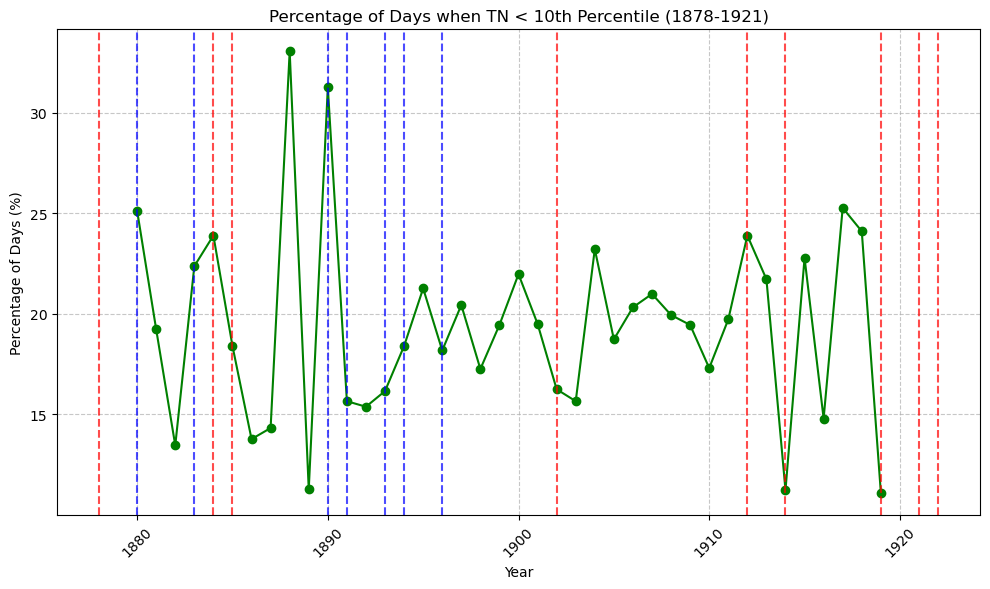

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing temperature data

# Filter out rows with invalid temperature values
filtered_df = df[df['tmin'] != -99.9]

# Filter out years outside the base period (1878-1921)
base_period_df = filtered_df[(filtered_df['year'] >= 1878) & (filtered_df['year'] <= 1921)]

# Calculate the 10th percentile for each day centered on a 5-day window
percentile_10th_base = base_period_df.groupby(['month', 'day'])['tmin'].transform(lambda x: x.rolling(window=5, center=True).quantile(0.1))

# Merge the base period percentiles with the target period data
merged_df = pd.concat([filtered_df, percentile_10th_base.rename('percentile_10th')], axis=1)

# Filter out rows with NaN values (due to edge effects)
merged_df = merged_df.dropna()

# Count the number of days when TN < 10th percentile for each year
below_10th_percentile = merged_df.groupby('year').apply(lambda x: (x['tmin'] < x['percentile_10th']).sum())

# Calculate the total number of days in each year
total_days_per_year = filtered_df.groupby('year').size()

# Calculate the percentage of days below the 10th percentile for each year
percentage_below_10th = (below_10th_percentile / total_days_per_year) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(percentage_below_10th.index, percentage_below_10th.values, marker='o', linestyle='-', color='green')
plt.title('Percentage of Days when TN < 10th Percentile (1878-1921)')
plt.xlabel('Year')
plt.ylabel('Percentage of Days (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Highlight gridlines for hot and cold years
hot_years = [1878, 1884, 1885, 1902, 1912, 1914, 1919, 1921, 1922]
cold_years = [1880, 1883, 1890, 1891, 1893, 1894, 1896]

for year in hot_years:
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.7)

for year in cold_years:
    plt.axvline(x=year, color='blue', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
